# College Admission Classification Example

Import libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

Read the data from the csv file   

In [133]:
data = pd.read_csv("College Admission Scores.csv", delimiter=";", decimal=".")


Plot the data

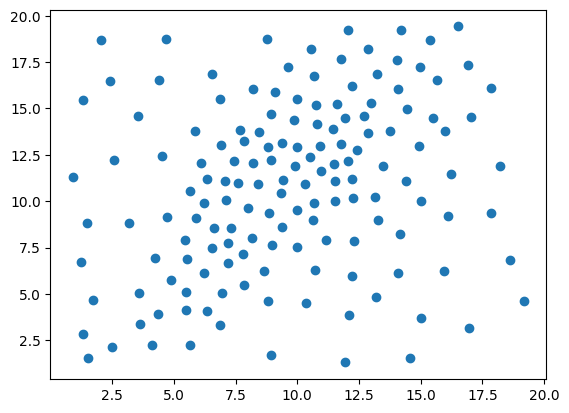

In [134]:
x = data['Exam1']
y = data['Exam2']

plt.scatter(x,y)

Calculatre the decision boundary based on the mean of the two exams

In [135]:
mean_exam1 = np.mean(data['Exam1'])
mean_exam2 = np.mean(data['Exam2'])
print(mean_exam1,mean_exam2)

decision_boundary = (x + y) / 2 > 10


9.660933333333332 10.759266666666667


Plot the data and color it using your calculated decision 

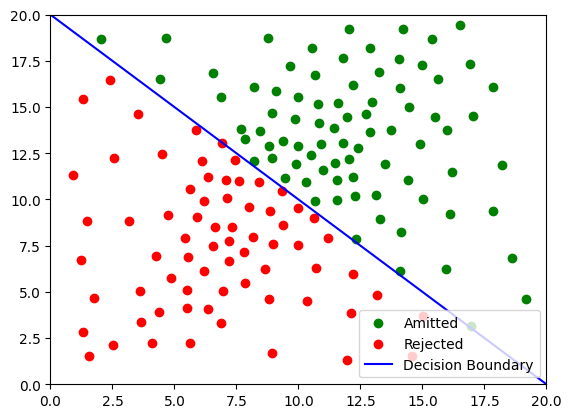

In [136]:
above_line = decision_boundary
below_line = ~above_line

plt.scatter(x[above_line], y[above_line], c='green', label='Amitted')
plt.scatter(x[below_line], y[below_line], c='red', label='Rejected')

plt.plot([0, 20], [20, 0], color='blue', label='Decision Boundary')

plt.xlim(0, 20)
plt.ylim(0, 20)


plt.legend()
plt.show()

Now, load the data file 'College Admission Scores and Decisions.csv'

In [137]:
data2 = pd.read_csv("College Admission Scores and Decisions.csv", delimiter=";", decimal=".")

Use a meshgrid to visualize the decision boundary as two spaces


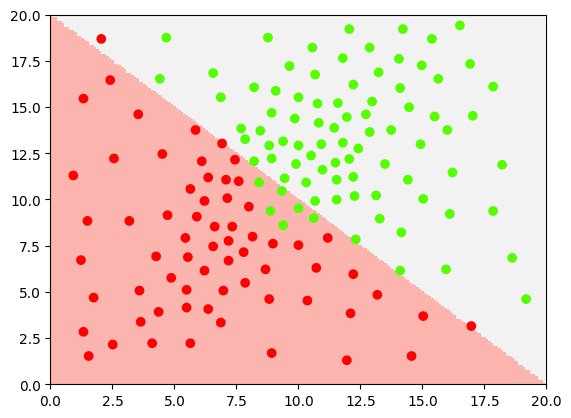

In [138]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = (xx.ravel()+ yy.ravel()) / 2 > 10
Z = Z.reshape(xx.shape)
cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")

plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'], cmap="prism")
plt.show()

Make the same previous plot by replacing the color of your points by the decision data

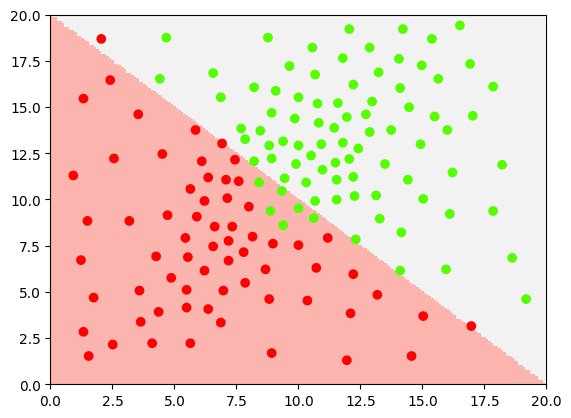

In [139]:

x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = (xx.ravel() + yy.ravel()) / 2 > 10
Z = Z.reshape(xx.shape)
cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")

plt.axis([0, 20, 0, 20])

plt.scatter(data2['Exam1'], data2['Exam2'], c=data2['Decision'], cmap="prism")



# Linear Discriminant Analysis

Create an LDA classifier and fit it over your data

In [140]:
X = data2[['Exam1', 'Exam2']]
y = data2['Decision'] 

In [141]:
lda = LinearDiscriminantAnalysis()

In [142]:
lda.fit(X, y)

LinearDiscriminantAnalysis()

Use a meshgrid to visualize the decision boundary of your LDA Classifier

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


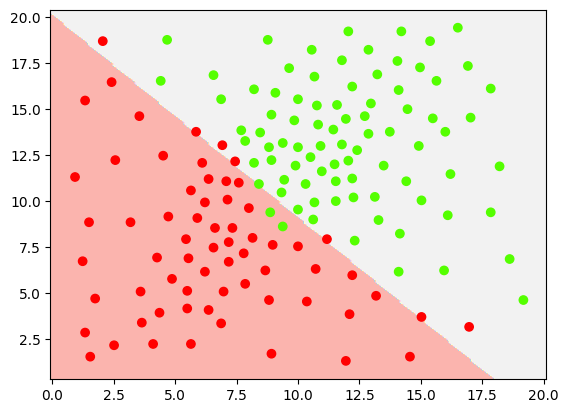

In [143]:
x_min, x_max = data2['Exam1'].min() - 1, data2['Exam1'].max() + 1
y_min, y_max = data2['Exam2'].min() - 1, data2['Exam2'].max() + 1
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="Pastel1")

plt.scatter(data2['Exam1'], data2['Exam2'], c=data2['Decision'], cmap='prism')




What is its accuracy ?

In [144]:
y_pred = lda.predict(X) 
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.94


What is the decision for a student with scores 19 and 0 ?

In [145]:
new_student = np.array([[19, 0]])
decision = lda.predict(new_student)
print(decision)

[1]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


---
# Quadratic Discriminant Analysis

Same questions...

In [146]:
X = data2[['Exam1', 'Exam2']] 
y = data2['Decision'] 

In [147]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

QuadraticDiscriminantAnalysis()

In [148]:
y_pred = qda.predict(X)

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


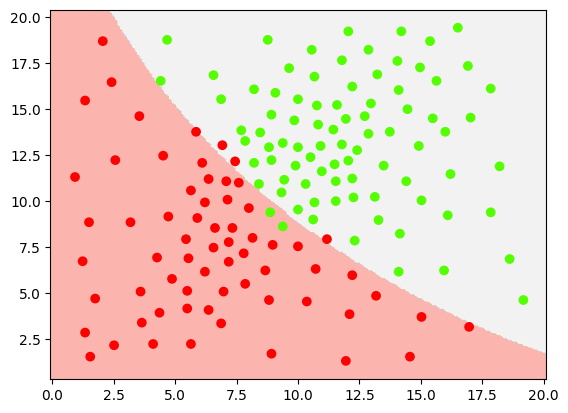

In [149]:
x_min, x_max = data2['Exam1'].min() - 1, data2['Exam1'].max() + 1
y_min, y_max = data2['Exam2'].min() - 1, data2['Exam2'].max() + 1
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="Pastel1")

plt.scatter(data2['Exam1'], data2['Exam2'], c=data2['Decision'], cmap='prism')

In [150]:
y_pred = qda.predict(X) 
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.9666666666666667


In [151]:
new_student = np.array([[19, 0]])
decision = qda.predict(new_student)
print(decision)

[0]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


---
# Decisision Tree Classifier

Same questions

In [152]:
x = data2[['Exam1', 'Exam2']] 
y = data2['Decision']

In [153]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)


DecisionTreeClassifier()

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


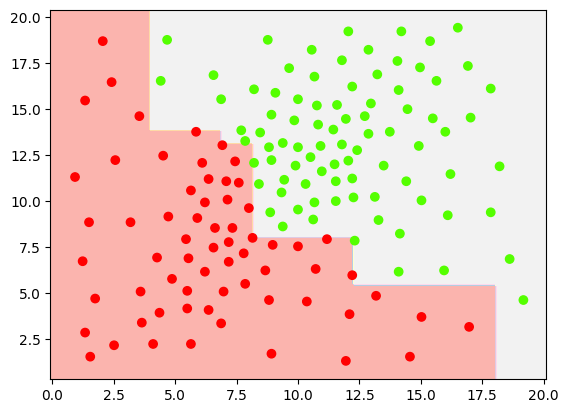

In [154]:
x_min, x_max = data2['Exam1'].min() - 1, data2['Exam1'].max() + 1
y_min, y_max = data2['Exam2'].min() - 1, data2['Exam2'].max() + 1
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="Pastel1")

plt.scatter(data2['Exam1'], data2['Exam2'], c=data2['Decision'], cmap='prism')

In [155]:
y_pred = tree_clf.predict(X) 
accuracy = accuracy_score(y, y_pred)
print(accuracy)

1.0


In [156]:
new_student = np.array([[19, 0]])
decision = tree_clf.predict(new_student)
print(decision)

[1]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [157]:
text_representation = export_text(tree_clf, feature_names=['Exam1', 'Exam2'])
print(text_representation)

|--- Exam1 <= 8.18
|   |--- Exam2 <= 13.14
|   |   |--- class: 0
|   |--- Exam2 >  13.14
|   |   |--- Exam1 <= 3.97
|   |   |   |--- class: 0
|   |   |--- Exam1 >  3.97
|   |   |   |--- Exam2 <= 13.80
|   |   |   |   |--- Exam1 <= 6.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Exam1 >  6.85
|   |   |   |   |   |--- class: 1
|   |   |   |--- Exam2 >  13.80
|   |   |   |   |--- class: 1
|--- Exam1 >  8.18
|   |--- Exam2 <= 8.07
|   |   |--- Exam1 <= 12.26
|   |   |   |--- class: 0
|   |   |--- Exam1 >  12.26
|   |   |   |--- Exam2 <= 5.50
|   |   |   |   |--- Exam1 <= 18.07
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Exam1 >  18.07
|   |   |   |   |   |--- class: 1
|   |   |   |--- Exam2 >  5.50
|   |   |   |   |--- class: 1
|   |--- Exam2 >  8.07
|   |   |--- class: 1



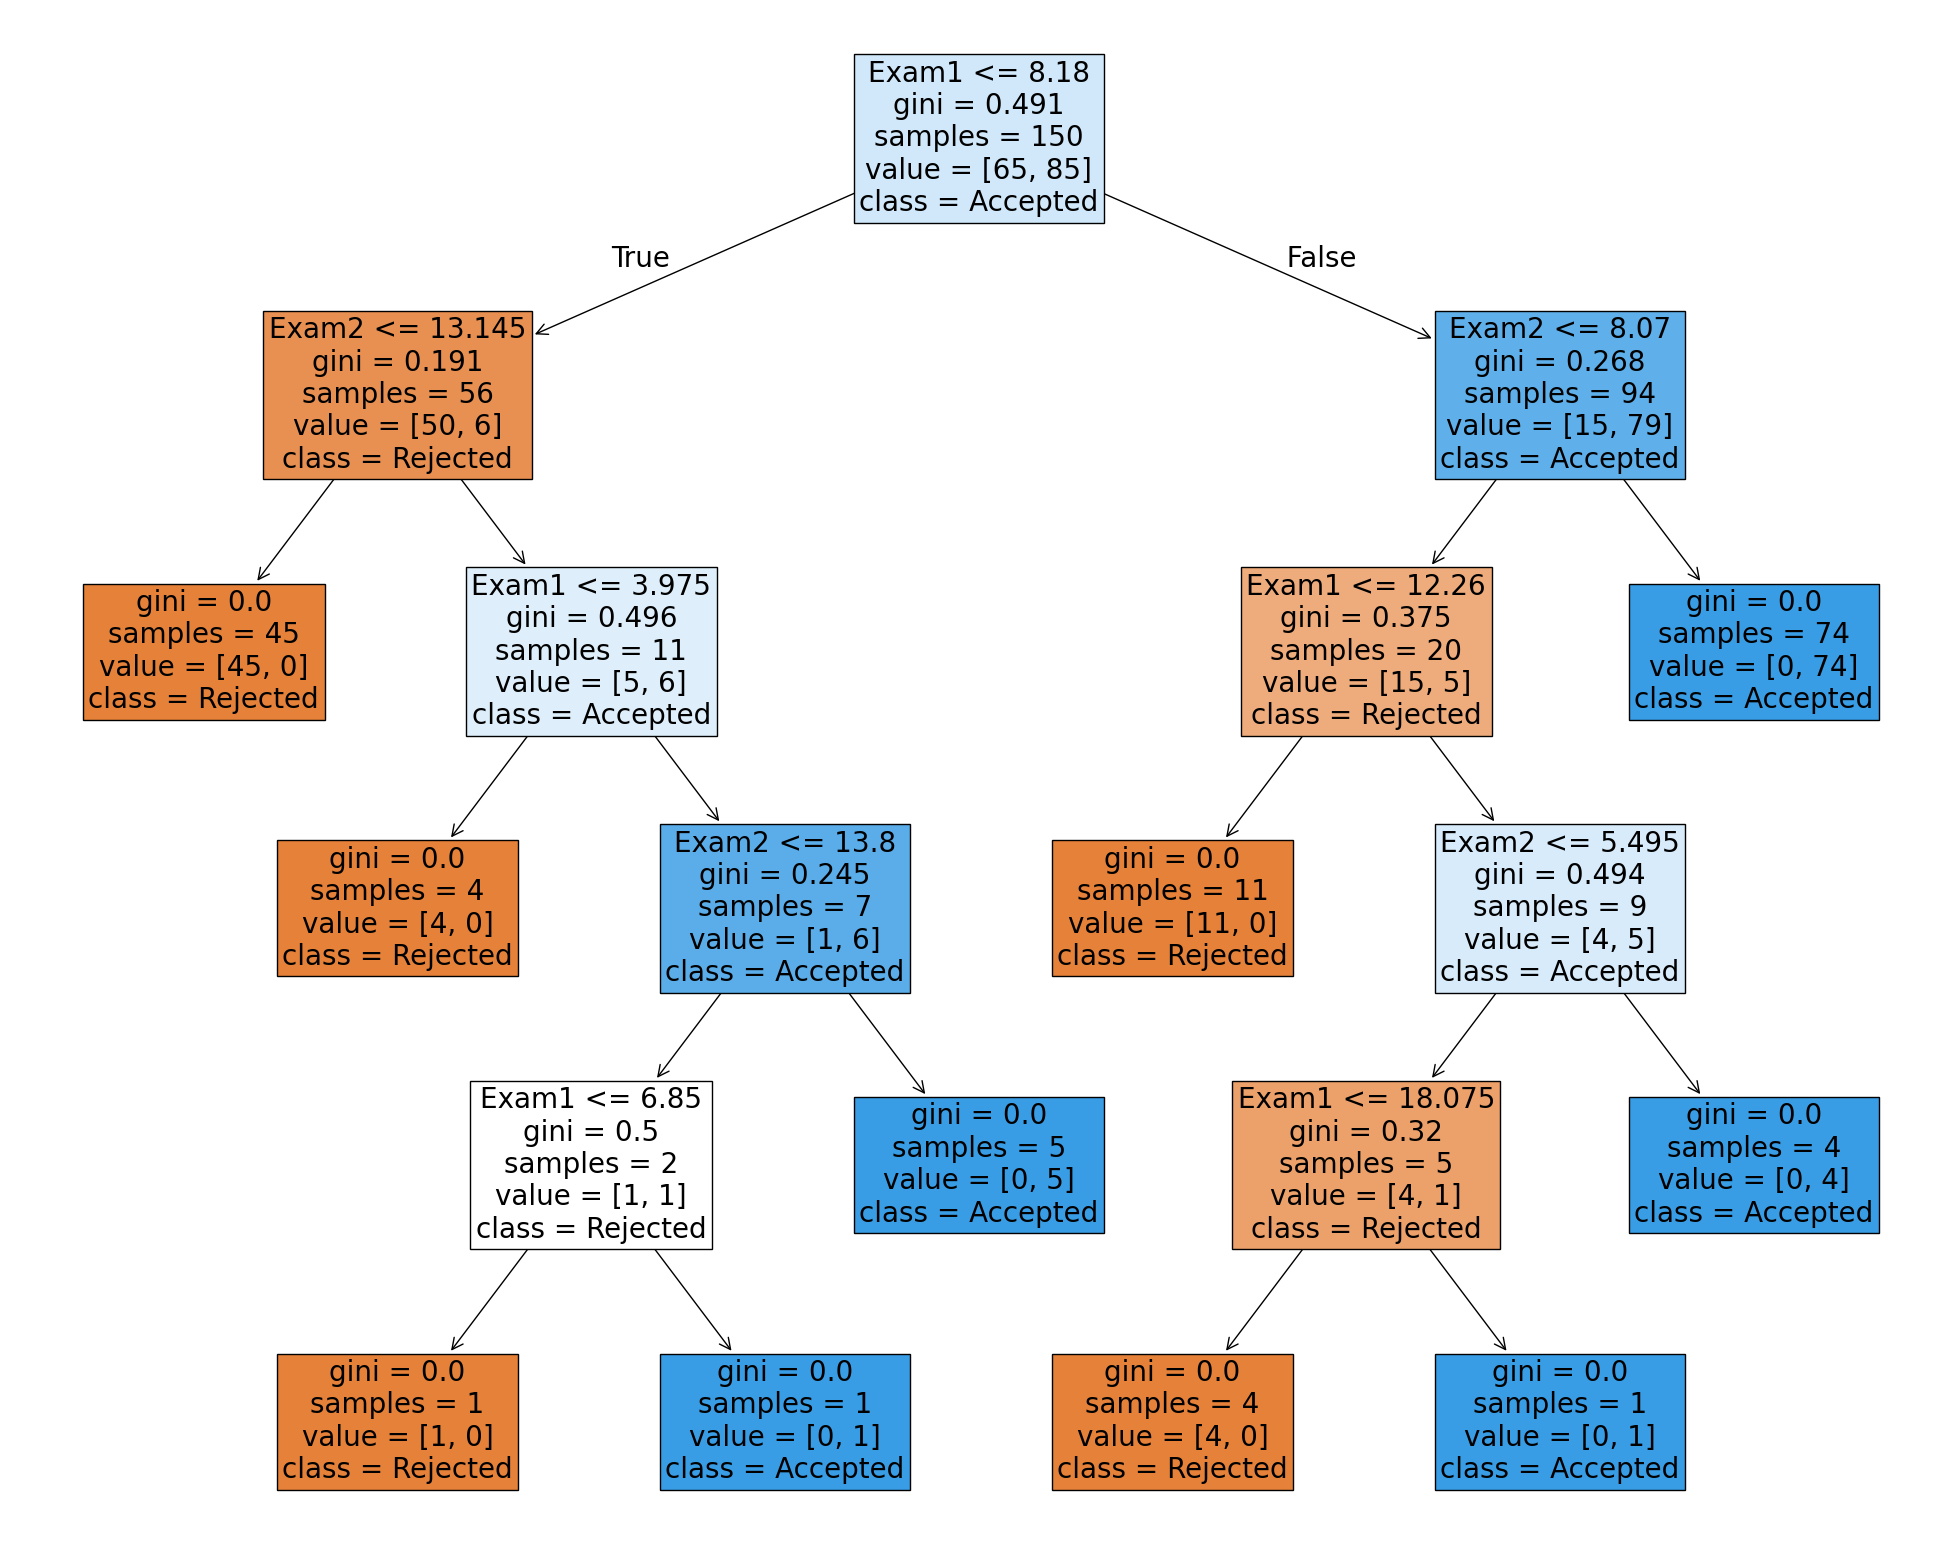

In [158]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names=['Exam1','Exam2'],  
                   class_names=['Rejected', 'Accepted'],
                   fontsize = 20,
                   filled=True)


---

# K-Nearest Neighbors Classifier (KNN)

Same questions

In [159]:
X = data2[['Exam1', 'Exam2']]
y = data2['Decision'] 

In [160]:
knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


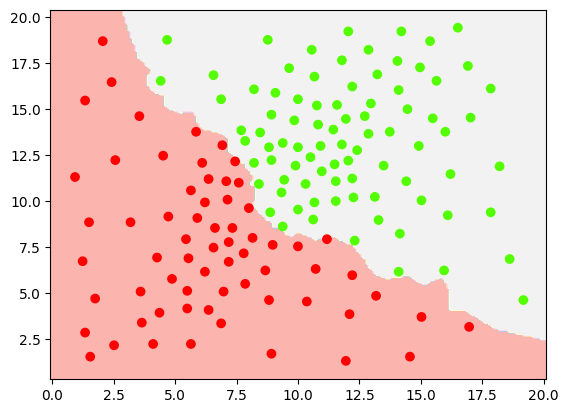

In [161]:
x_min, x_max = data2['Exam1'].min() - 1, data2['Exam1'].max() + 1
y_min, y_max = data2['Exam2'].min() - 1, data2['Exam2'].max() + 1
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="Pastel1")

plt.scatter(data2['Exam1'], data2['Exam2'], c=data2['Decision'], cmap='prism')

In [162]:
y_pred = knn.predict(X) 
accuracy = accuracy_score(y, y_pred)
print(accuracy)

1.0


In [163]:
new_student = np.array([[19, 0]])
decision = knn.predict(new_student)
print(decision)

[0]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


---
# Random Forest Classifier

Same questions...

In [164]:
X = data2[['Exam1', 'Exam2']] 
y = data2['Decision'] 

In [165]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)


RandomForestClassifier(random_state=42)

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


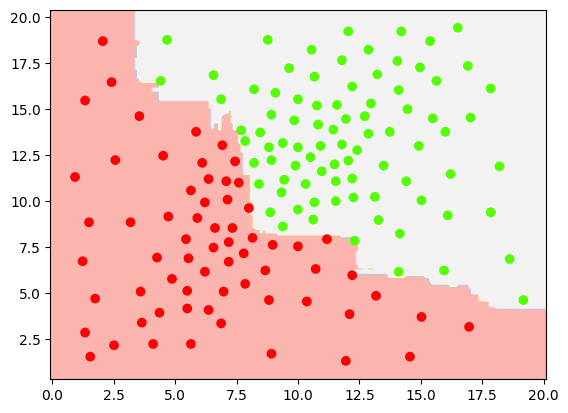

In [166]:
x_min, x_max = data2['Exam1'].min() - 1, data2['Exam1'].max() + 1
y_min, y_max = data2['Exam2'].min() - 1, data2['Exam2'].max() + 1
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="Pastel1")

plt.scatter(data2['Exam1'], data2['Exam2'], c=data2['Decision'], cmap='prism')